In [1692]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1693]:
df = pd.read_csv("flipkart_laptop.csv")

In [1694]:
df.head()

,Name,Price,Discount,Original_price,Description,Product_left
0,DELL 18 Intel Core Ultra 9 275HX - (64 GB/2 TB...,487990,18% off,598529.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 1 left
1,DELL 16 Intel Core Ultra 9 275HX - (64 GB/2 TB...,472990,18% off,581214.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 1 left
2,MSI Raider 18 HX AI Intel Core Ultra 9 285HX -...,459990,17% off,559990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 4 left
3,ASUS ROG Strix SCAR 18 (2025) AI PC with Offic...,449990,11% off,509990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 3 left
4,DELL Alienware Intel Core Ultra 9 185H - (32 G...,448490,21% off,572317.0,Intel Core Ultra 9 Processor; 32 GB LPDDR5X RA...,Only 1 left


In [1695]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            984 non-null    object 
 1   Price           984 non-null    int64  
 2   Discount        874 non-null    object 
 3   Original_price  881 non-null    float64
 4   Description     984 non-null    object 
 5   Product_left    983 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.3+ KB


In [1696]:
df.isnull().sum()

Name                0
Price               0
Discount          110
Original_price    103
Description         0
Product_left        1
dtype: int64

In [1697]:
df.duplicated().sum()

46

Let’s Remove Duplicate Records for Data Consistency

In [1699]:
df.drop_duplicates(inplace=True)

In [1700]:
# 1. Fill missing Disount with Zero
df['Discount'] = df['Discount'].fillna(0)

# Fill original Price 
df['Original_price'] = df['Original_price'].fillna(df['Price'])


In [1701]:
df.columns

Index(['Name', 'Price', 'Discount', 'Original_price', 'Description',
       'Product_left'],
      dtype='object')


Let’s Extract and Standardize laptop Brands for Consistency

In [1703]:

# List of valid brands(lower case)
brand_laptop = [b.lower() for b in [
    "Dell","HP","Lenovo","Acer","Asus","Apple","Microsoft","Samsung",
    "MSI","Razer","Alienware","Toshiba","Fujitsu","Huawei","LG",
    "Panasonic","Sony VAIO","Xiaomi","Realme","Infinix","Honor",
    "Chuwi","Avita"
]]

# Clean brands: if not valid, try second word
def clean_brand(name):
    words = name.lower().split()
    if not words:
        return "unknown"
    
    if words[0] in brand_laptop:
        return words[0].title()
    elif len(words) > 1 and words[1] in brand_laptop:
        return words[1].title()
    else:
        return "Unknown"

df["Brand"] = df["Name"].apply(clean_brand)


In [1704]:
# Discount clean
df['Discount'] = (
    df['Discount'].astype(str)
    .str.replace("% off", "",regex=False)
    .str.replace("%", "", regex=False)
    .str.strip()
)

# convert Discount to numeric
df['Discount'] = pd.to_numeric(df['Discount'], errors ='coerce')

In [1705]:
df.head()

,Name,Price,Discount,Original_price,Description,Product_left,Brand
0,DELL 18 Intel Core Ultra 9 275HX - (64 GB/2 TB...,487990,18,598529.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 1 left,Dell
1,DELL 16 Intel Core Ultra 9 275HX - (64 GB/2 TB...,472990,18,581214.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 1 left,Dell
2,MSI Raider 18 HX AI Intel Core Ultra 9 285HX -...,459990,17,559990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 4 left,Msi
3,ASUS ROG Strix SCAR 18 (2025) AI PC with Offic...,449990,11,509990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 3 left,Asus
4,DELL Alienware Intel Core Ultra 9 185H - (32 G...,448490,21,572317.0,Intel Core Ultra 9 Processor; 32 GB LPDDR5X RA...,Only 1 left,Dell


In [1706]:
df["RAM_GB"] = df["Description"].str.extract(r"(\d+)\s*GB").astype(float)
df.head()

,Name,Price,Discount,Original_price,Description,Product_left,Brand,RAM_GB
0,DELL 18 Intel Core Ultra 9 275HX - (64 GB/2 TB...,487990,18,598529.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 1 left,Dell,64.0
1,DELL 16 Intel Core Ultra 9 275HX - (64 GB/2 TB...,472990,18,581214.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 1 left,Dell,64.0
2,MSI Raider 18 HX AI Intel Core Ultra 9 285HX -...,459990,17,559990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 4 left,Msi,64.0
3,ASUS ROG Strix SCAR 18 (2025) AI PC with Offic...,449990,11,509990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 3 left,Asus,64.0
4,DELL Alienware Intel Core Ultra 9 185H - (32 G...,448490,21,572317.0,Intel Core Ultra 9 Processor; 32 GB LPDDR5X RA...,Only 1 left,Dell,32.0


In [1707]:
df["OS"] = df['Description'].str.extract(r'(Mac OS|Windows\s*\d+|DOS\s*\d*\.?\d*|Chrome)', expand=False)


# Create Platform column
df['Platform'] = df['OS'].apply(
    lambda x: 'Mac' if pd.notnull(x) and 'Mac' in x 
             else 'Windows' if pd.notnull(x) and 'Windows' in x 
             else 'DOS' if pd.notnull(x) and 'DOS' in x 
             else 'Chrome' if pd.notnull(x) and 'Chrome' in x else 'other')
df.head(20)

,Name,Price,Discount,Original_price,Description,Product_left,Brand,RAM_GB,OS,Platform
0,DELL 18 Intel Core Ultra 9 275HX - (64 GB/2 TB...,487990,18,598529.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 1 left,Dell,64.0,Windows 11,Windows
1,DELL 16 Intel Core Ultra 9 275HX - (64 GB/2 TB...,472990,18,581214.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 1 left,Dell,64.0,Windows 11,Windows
2,MSI Raider 18 HX AI Intel Core Ultra 9 285HX -...,459990,17,559990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 4 left,Msi,64.0,Windows 11,Windows
3,ASUS ROG Strix SCAR 18 (2025) AI PC with Offic...,449990,11,509990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 3 left,Asus,64.0,Windows 11,Windows
4,DELL Alienware Intel Core Ultra 9 185H - (32 G...,448490,21,572317.0,Intel Core Ultra 9 Processor; 32 GB LPDDR5X RA...,Only 1 left,Dell,32.0,Windows 11,Windows
5,ASUS ROG Strix SCAR 16 (2025) with Office 2024...,424990,11,479990.0,Intel Core Ultra 9 Processor; 32 GB DDR5 RAM; ...,Only few left,Asus,32.0,Windows 11,Windows
6,MSI Raider 18 HX AI Intel Core Ultra 9 285HX -...,419990,12,481990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 1 left,Msi,64.0,Windows 11,Windows
7,DELL 18 Intel Core Ultra 9 275HX - (32 GB/2 TB...,406490,19,502679.0,Intel Core Ultra 9 Processor; 32 GB DDR5 RAM; ...,Only 2 left,Dell,32.0,Windows 11,Windows
8,DELL 16 Intel Core Ultra 9 275HX - (32 GB/2 TB...,396490,19,489538.0,Intel Core Ultra 9 Processor; 32 GB DDR5 RAM; ...,Only 1 left,Dell,32.0,Windows 11,Windows
9,ALIENWARE Intel Core i9 10th Gen 10980HK - (32...,377798,0,377798.0,NVIDIA GeForce RTX 2080 with Max-Q; 15.6 inch ...,Only 1 left,Alienware,32.0,Windows 10,Windows


In [1708]:
# Extract storage number and unit
storage_info = df['Description'].str.extract(r'(?P<Storage_num>\d+)\s*(?P<Storage_unit>TB|GB SSD)')
df['Storage_num'] = storage_info['Storage_num'].astype(float)
df['Storage_unit'] = storage_info['Storage_unit']

# Convert everything to GB for consistency
df['Storage_GB'] = df.apply(lambda row: row['Storage_num']*1024 if row['Storage_unit']=='TB' else row['Storage_num'], axis=1)




df.head(5)

,Name,Price,Discount,Original_price,Description,Product_left,Brand,RAM_GB,OS,Platform,Storage_num,Storage_unit,Storage_GB
0,DELL 18 Intel Core Ultra 9 275HX - (64 GB/2 TB...,487990,18,598529.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 1 left,Dell,64.0,Windows 11,Windows,2.0,TB,2048.0
1,DELL 16 Intel Core Ultra 9 275HX - (64 GB/2 TB...,472990,18,581214.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 1 left,Dell,64.0,Windows 11,Windows,2.0,TB,2048.0
2,MSI Raider 18 HX AI Intel Core Ultra 9 285HX -...,459990,17,559990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 4 left,Msi,64.0,Windows 11,Windows,2.0,TB,2048.0
3,ASUS ROG Strix SCAR 18 (2025) AI PC with Offic...,449990,11,509990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 3 left,Asus,64.0,Windows 11,Windows,2.0,TB,2048.0
4,DELL Alienware Intel Core Ultra 9 185H - (32 G...,448490,21,572317.0,Intel Core Ultra 9 Processor; 32 GB LPDDR5X RA...,Only 1 left,Dell,32.0,Windows 11,Windows,1.0,TB,1024.0


In [1709]:

df['Warranty_str'] = df['Description'].str.extract(r'(\d+\s*(?:Year|yr|YEAR|Yr|-year|year))', expand=False)
df['Warranty'] = df['Warranty_str'].str.extract(r'(\d+)').astype(float)

df['Warranty'] = df['Warranty'].fillna(1)

df.head(10)

,Name,Price,Discount,Original_price,Description,Product_left,Brand,RAM_GB,OS,Platform,Storage_num,Storage_unit,Storage_GB,Warranty_str,Warranty
0,DELL 18 Intel Core Ultra 9 275HX - (64 GB/2 TB...,487990,18,598529.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 1 left,Dell,64.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0
1,DELL 16 Intel Core Ultra 9 275HX - (64 GB/2 TB...,472990,18,581214.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 1 left,Dell,64.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0
2,MSI Raider 18 HX AI Intel Core Ultra 9 285HX -...,459990,17,559990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 4 left,Msi,64.0,Windows 11,Windows,2.0,TB,2048.0,2 Year,2.0
3,ASUS ROG Strix SCAR 18 (2025) AI PC with Offic...,449990,11,509990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 3 left,Asus,64.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0
4,DELL Alienware Intel Core Ultra 9 185H - (32 G...,448490,21,572317.0,Intel Core Ultra 9 Processor; 32 GB LPDDR5X RA...,Only 1 left,Dell,32.0,Windows 11,Windows,1.0,TB,1024.0,1 Year,1.0
5,ASUS ROG Strix SCAR 16 (2025) with Office 2024...,424990,11,479990.0,Intel Core Ultra 9 Processor; 32 GB DDR5 RAM; ...,Only few left,Asus,32.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0
6,MSI Raider 18 HX AI Intel Core Ultra 9 285HX -...,419990,12,481990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 1 left,Msi,64.0,Windows 11,Windows,4.0,TB,4096.0,2 Year,2.0
7,DELL 18 Intel Core Ultra 9 275HX - (32 GB/2 TB...,406490,19,502679.0,Intel Core Ultra 9 Processor; 32 GB DDR5 RAM; ...,Only 2 left,Dell,32.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0
8,DELL 16 Intel Core Ultra 9 275HX - (32 GB/2 TB...,396490,19,489538.0,Intel Core Ultra 9 Processor; 32 GB DDR5 RAM; ...,Only 1 left,Dell,32.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0
9,ALIENWARE Intel Core i9 10th Gen 10980HK - (32...,377798,0,377798.0,NVIDIA GeForce RTX 2080 with Max-Q; 15.6 inch ...,Only 1 left,Alienware,32.0,Windows 10,Windows,1.0,TB,1024.0,1 Year,1.0


In [1710]:
df['Processor_Brand'] = df['Description'].str.extract(r'(\bIntel\b|\bAMD\b|\bApple\b|\bSnapdragon\b|\bQualcomm\b).*Processor')
df.head()

,Name,Price,Discount,Original_price,Description,Product_left,Brand,RAM_GB,OS,Platform,Storage_num,Storage_unit,Storage_GB,Warranty_str,Warranty,Processor_Brand
0,DELL 18 Intel Core Ultra 9 275HX - (64 GB/2 TB...,487990,18,598529.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 1 left,Dell,64.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0,Intel
1,DELL 16 Intel Core Ultra 9 275HX - (64 GB/2 TB...,472990,18,581214.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 1 left,Dell,64.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0,Intel
2,MSI Raider 18 HX AI Intel Core Ultra 9 285HX -...,459990,17,559990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 4 left,Msi,64.0,Windows 11,Windows,2.0,TB,2048.0,2 Year,2.0,Intel
3,ASUS ROG Strix SCAR 18 (2025) AI PC with Offic...,449990,11,509990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 3 left,Asus,64.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0,Intel
4,DELL Alienware Intel Core Ultra 9 185H - (32 G...,448490,21,572317.0,Intel Core Ultra 9 Processor; 32 GB LPDDR5X RA...,Only 1 left,Dell,32.0,Windows 11,Windows,1.0,TB,1024.0,1 Year,1.0,Intel


In [1711]:
# Keep full processor
df['Processor_Full'] = df['Description'].str.split(';').str[0].str.strip()

df.head(12)

,Name,Price,Discount,Original_price,Description,Product_left,Brand,RAM_GB,OS,Platform,Storage_num,Storage_unit,Storage_GB,Warranty_str,Warranty,Processor_Brand,Processor_Full
0,DELL 18 Intel Core Ultra 9 275HX - (64 GB/2 TB...,487990,18,598529.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 1 left,Dell,64.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor
1,DELL 16 Intel Core Ultra 9 275HX - (64 GB/2 TB...,472990,18,581214.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 1 left,Dell,64.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor
2,MSI Raider 18 HX AI Intel Core Ultra 9 285HX -...,459990,17,559990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 4 left,Msi,64.0,Windows 11,Windows,2.0,TB,2048.0,2 Year,2.0,Intel,Intel Core Ultra 9 Processor
3,ASUS ROG Strix SCAR 18 (2025) AI PC with Offic...,449990,11,509990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 3 left,Asus,64.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor
4,DELL Alienware Intel Core Ultra 9 185H - (32 G...,448490,21,572317.0,Intel Core Ultra 9 Processor; 32 GB LPDDR5X RA...,Only 1 left,Dell,32.0,Windows 11,Windows,1.0,TB,1024.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor
5,ASUS ROG Strix SCAR 16 (2025) with Office 2024...,424990,11,479990.0,Intel Core Ultra 9 Processor; 32 GB DDR5 RAM; ...,Only few left,Asus,32.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor
6,MSI Raider 18 HX AI Intel Core Ultra 9 285HX -...,419990,12,481990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 1 left,Msi,64.0,Windows 11,Windows,4.0,TB,4096.0,2 Year,2.0,Intel,Intel Core Ultra 9 Processor
7,DELL 18 Intel Core Ultra 9 275HX - (32 GB/2 TB...,406490,19,502679.0,Intel Core Ultra 9 Processor; 32 GB DDR5 RAM; ...,Only 2 left,Dell,32.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor
8,DELL 16 Intel Core Ultra 9 275HX - (32 GB/2 TB...,396490,19,489538.0,Intel Core Ultra 9 Processor; 32 GB DDR5 RAM; ...,Only 1 left,Dell,32.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor
9,ALIENWARE Intel Core i9 10th Gen 10980HK - (32...,377798,0,377798.0,NVIDIA GeForce RTX 2080 with Max-Q; 15.6 inch ...,Only 1 left,Alienware,32.0,Windows 10,Windows,1.0,TB,1024.0,1 Year,1.0,Intel,NVIDIA GeForce RTX 2080 with Max-Q


In [1712]:

df['Availability'] = df['Product_left'].apply(lambda x: 'In Stock' if isinstance(x, str) else 'Limited')
df['Product_left'] = pd.to_numeric(df['Product_left'], errors='coerce')

df.head(40)

,Name,Price,Discount,Original_price,Description,Product_left,Brand,RAM_GB,OS,Platform,Storage_num,Storage_unit,Storage_GB,Warranty_str,Warranty,Processor_Brand,Processor_Full,Availability
0,DELL 18 Intel Core Ultra 9 275HX - (64 GB/2 TB...,487990,18,598529.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,NaN,Dell,64.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor,In Stock
1,DELL 16 Intel Core Ultra 9 275HX - (64 GB/2 TB...,472990,18,581214.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,NaN,Dell,64.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor,In Stock
2,MSI Raider 18 HX AI Intel Core Ultra 9 285HX -...,459990,17,559990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,NaN,Msi,64.0,Windows 11,Windows,2.0,TB,2048.0,2 Year,2.0,Intel,Intel Core Ultra 9 Processor,In Stock
3,ASUS ROG Strix SCAR 18 (2025) AI PC with Offic...,449990,11,509990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,NaN,Asus,64.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor,In Stock
4,DELL Alienware Intel Core Ultra 9 185H - (32 G...,448490,21,572317.0,Intel Core Ultra 9 Processor; 32 GB LPDDR5X RA...,NaN,Dell,32.0,Windows 11,Windows,1.0,TB,1024.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor,In Stock
5,ASUS ROG Strix SCAR 16 (2025) with Office 2024...,424990,11,479990.0,Intel Core Ultra 9 Processor; 32 GB DDR5 RAM; ...,NaN,Asus,32.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor,In Stock
6,MSI Raider 18 HX AI Intel Core Ultra 9 285HX -...,419990,12,481990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,NaN,Msi,64.0,Windows 11,Windows,4.0,TB,4096.0,2 Year,2.0,Intel,Intel Core Ultra 9 Processor,In Stock
7,DELL 18 Intel Core Ultra 9 275HX - (32 GB/2 TB...,406490,19,502679.0,Intel Core Ultra 9 Processor; 32 GB DDR5 RAM; ...,NaN,Dell,32.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor,In Stock
8,DELL 16 Intel Core Ultra 9 275HX - (32 GB/2 TB...,396490,19,489538.0,Intel Core Ultra 9 Processor; 32 GB DDR5 RAM; ...,NaN,Dell,32.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor,In Stock
9,ALIENWARE Intel Core i9 10th Gen 10980HK - (32...,377798,0,377798.0,NVIDIA GeForce RTX 2080 with Max-Q; 15.6 inch ...,NaN,Alienware,32.0,Windows 10,Windows,1.0,TB,1024.0,1 Year,1.0,Intel,NVIDIA GeForce RTX 2080 with Max-Q,In Stock


In [1713]:
print(df['Warranty'].dtype)


float64


In [1714]:
df['Display_cm'] = df['Description'].str.extract(r'(\d+\.?\d*)\s*cm', expand=False).astype(float)


In [1715]:
import re

df['Clean_Description'] = df['Description'].str.replace(r'\$', '', regex=True)

df['Display_inch'] = df['Clean_Description'].str.extract(
    r'(\d+\.?\d*)\s*inch',
    flags=re.IGNORECASE,expand=False).astype(float)

df.head()

,Name,Price,Discount,Original_price,Description,Product_left,Brand,RAM_GB,OS,Platform,...,Storage_unit,Storage_GB,Warranty_str,Warranty,Processor_Brand,Processor_Full,Availability,Display_cm,Clean_Description,Display_inch
0,DELL 18 Intel Core Ultra 9 275HX - (64 GB/2 TB...,487990,18,598529.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,NaN,Dell,64.0,Windows 11,Windows,...,TB,2048.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor,In Stock,45.72,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,18.0
1,DELL 16 Intel Core Ultra 9 275HX - (64 GB/2 TB...,472990,18,581214.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,NaN,Dell,64.0,Windows 11,Windows,...,TB,2048.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor,In Stock,40.64,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,16.0
2,MSI Raider 18 HX AI Intel Core Ultra 9 285HX -...,459990,17,559990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,NaN,Msi,64.0,Windows 11,Windows,...,TB,2048.0,2 Year,2.0,Intel,Intel Core Ultra 9 Processor,In Stock,45.72,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,18.0
3,ASUS ROG Strix SCAR 18 (2025) AI PC with Offic...,449990,11,509990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,NaN,Asus,64.0,Windows 11,Windows,...,TB,2048.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor,In Stock,45.72,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,18.0
4,DELL Alienware Intel Core Ultra 9 185H - (32 G...,448490,21,572317.0,Intel Core Ultra 9 Processor; 32 GB LPDDR5X RA...,NaN,Dell,32.0,Windows 11,Windows,...,TB,1024.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor,In Stock,40.64,Intel Core Ultra 9 Processor; 32 GB LPDDR5X RA...,16.0


In [1716]:
import re
import pandas as pd

# Function to extract numeric processor generation
def extract_gen_number(desc):
    desc = str(desc)
    
    # Look for standard gen formats: e.g., "13th Gen", "12th Gen"
    match = re.search(r'(\d{1,2})(?:th|st|rd|nd)?\s*Gen', desc)
    if match:
        return int(match.group(1))
    
    # Look for "Core Ultra 9" or similar and take the number
    match2 = re.search(r'Core Ultra (\d+)', desc)
    if match2:
        return int(match2.group(1))
    
    return None

# Apply to your existing DataFrame
df['Processor_Gen_Num'] = df['Description'].apply(extract_gen_number)


In [1717]:
df.isnull().sum()

Name                   0
Price                  0
Discount               0
Original_price         0
Description            0
Product_left         938
Brand                  0
RAM_GB                 0
OS                     0
Platform               0
Storage_num            1
Storage_unit           1
Storage_GB             1
Warranty_str           4
Warranty               0
Processor_Brand        0
Processor_Full         0
Availability           0
Display_cm             0
Clean_Description      0
Display_inch           0
Processor_Gen_Num    273
dtype: int64

In [1718]:
# Using median
df['Processor_Gen_Num'] = df.groupby('Brand')['Processor_Gen_Num'].transform(lambda x: x.median())
df['Processor_Gen_Num'] = df['Processor_Gen_Num'].fillna(df['Processor_Gen_Num'].median())

median_gen = df['Processor_Gen_Num'].median()
df['Processor_Gen_Num'] = df['Processor_Gen_Num'].fillna(median_gen)

median_num = df['Storage_num'].median()
df['Storage_num'] = df['Storage_num'].fillna(median_num)

median_GB = df['Storage_GB'].median()
df['Storage_GB'] = df['Storage_GB'].fillna(median_GB)
# using mode
mode_unit = df['Storage_unit'].mode()[0]
df['Storage_unit'] = df['Storage_unit'].fillna(mode_unit)

mode_warranty = df['Warranty_str'].mode()[0]
df['Warranty_str'] = df['Warranty_str'].fillna(mode_warranty)

In [1719]:
df = df.drop(columns=['Name','Description','Product_left'])

In [1720]:
df.head()

,Price,Discount,Original_price,Brand,RAM_GB,OS,Platform,Storage_num,Storage_unit,Storage_GB,Warranty_str,Warranty,Processor_Brand,Processor_Full,Availability,Display_cm,Clean_Description,Display_inch,Processor_Gen_Num
0,487990,18,598529.0,Dell,64.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor,In Stock,45.72,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,18.0,12.0
1,472990,18,581214.0,Dell,64.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor,In Stock,40.64,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,16.0,12.0
2,459990,17,559990.0,Msi,64.0,Windows 11,Windows,2.0,TB,2048.0,2 Year,2.0,Intel,Intel Core Ultra 9 Processor,In Stock,45.72,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,18.0,11.0
3,449990,11,509990.0,Asus,64.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor,In Stock,45.72,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,18.0,11.0
4,448490,21,572317.0,Dell,32.0,Windows 11,Windows,1.0,TB,1024.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor,In Stock,40.64,Intel Core Ultra 9 Processor; 32 GB LPDDR5X RA...,16.0,12.0


In [1721]:
df= df[['Brand','Processor_Brand','Processor_Full','Price','Discount','Original_price','RAM_GB','OS','Platform','Storage_GB','Storage_unit','Display_cm','Display_inch','Warranty','Availability','Processor_Gen_Num','Clean_Description']]

In [1722]:
df.head(5)

,Brand,Processor_Brand,Processor_Full,Price,Discount,Original_price,RAM_GB,OS,Platform,Storage_GB,Storage_unit,Display_cm,Display_inch,Warranty,Availability,Processor_Gen_Num,Clean_Description
0,Dell,Intel,Intel Core Ultra 9 Processor,487990,18,598529.0,64.0,Windows 11,Windows,2048.0,TB,45.72,18.0,1.0,In Stock,12.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...
1,Dell,Intel,Intel Core Ultra 9 Processor,472990,18,581214.0,64.0,Windows 11,Windows,2048.0,TB,40.64,16.0,1.0,In Stock,12.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...
2,Msi,Intel,Intel Core Ultra 9 Processor,459990,17,559990.0,64.0,Windows 11,Windows,2048.0,TB,45.72,18.0,2.0,In Stock,11.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...
3,Asus,Intel,Intel Core Ultra 9 Processor,449990,11,509990.0,64.0,Windows 11,Windows,2048.0,TB,45.72,18.0,1.0,In Stock,11.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...
4,Dell,Intel,Intel Core Ultra 9 Processor,448490,21,572317.0,32.0,Windows 11,Windows,1024.0,TB,40.64,16.0,1.0,In Stock,12.0,Intel Core Ultra 9 Processor; 32 GB LPDDR5X RA...


In [1723]:
df.isnull().sum()

Brand                0
Processor_Brand      0
Processor_Full       0
Price                0
Discount             0
Original_price       0
RAM_GB               0
OS                   0
Platform             0
Storage_GB           0
Storage_unit         0
Display_cm           0
Display_inch         0
Warranty             0
Availability         0
Processor_Gen_Num    0
Clean_Description    0
dtype: int64

In [1724]:
df.loc[112,'Storage_GB']

1024.0

In [1725]:
df.columns

Index(['Brand', 'Processor_Brand', 'Processor_Full', 'Price', 'Discount',
       'Original_price', 'RAM_GB', 'OS', 'Platform', 'Storage_GB',
       'Storage_unit', 'Display_cm', 'Display_inch', 'Warranty',
       'Availability', 'Processor_Gen_Num', 'Clean_Description'],
      dtype='object')

In [1726]:

print(df.dtypes)


Brand                 object
Processor_Brand       object
Processor_Full        object
Price                  int64
Discount               int64
Original_price       float64
RAM_GB               float64
OS                    object
Platform              object
Storage_GB           float64
Storage_unit          object
Display_cm           float64
Display_inch         float64
Warranty             float64
Availability          object
Processor_Gen_Num    float64
Clean_Description     object
dtype: object


In [1727]:
ideal_columns = ['Brand','Processor_Brand','Processor_Full','Price','Discount','Original_price','RAM_GB',
                 'OS','Platform','Storage_GB','Storage_unit','Display_cm',
                 'Display_inch','Warranty','Availability','Processor_Gen_Num','Clean_Description']

# Keep only columns that exist in df
df = df[[col for col in ideal_columns if col in df.columns]]

output_file = 'laptop_file.csv'

# Write CSV in chunks to avoid MemoryError
chunksize = 100000  # adjust depending on your RAM
for i, start in enumerate(range(0, len(df), chunksize)):
    chunk = df.iloc[start:start+chunksize]
    if i == 0:
        chunk.to_csv(output_file, index=False)  # write header for first chunk
    else:
        chunk.to_csv(output_file, index=False, mode='a', header=False)  # append without header

print(f"✅ Dataset saved as '{output_file}' in chunks")


✅ Dataset saved as 'laptop_file.csv' in chunks


In [1728]:
new_df = pd.read_csv('laptop_file.csv', low_memory=False)


In [1729]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938 entries, 0 to 937
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              938 non-null    object 
 1   Processor_Brand    938 non-null    object 
 2   Processor_Full     938 non-null    object 
 3   Price              938 non-null    int64  
 4   Discount           938 non-null    int64  
 5   Original_price     938 non-null    float64
 6   RAM_GB             938 non-null    float64
 7   OS                 938 non-null    object 
 8   Platform           938 non-null    object 
 9   Storage_GB         938 non-null    float64
 10  Storage_unit       938 non-null    object 
 11  Display_cm         938 non-null    float64
 12  Display_inch       938 non-null    float64
 13  Warranty           938 non-null    float64
 14  Availability       938 non-null    object 
 15  Processor_Gen_Num  938 non-null    float64
 16  Clean_Description  938 non

In [1730]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,938.0,115296.748401,64009.736888,61999.0,72990.00,91990.00,132740.00,487990.00
Discount,938.0,18.727079,11.683031,0.0,10.00,19.00,27.00,60.00
Original_price,938.0,143160.156716,76496.132776,62589.0,95000.00,116999.00,164997.50,598529.00
RAM_GB,938.0,18.019190,17.767010,8.0,16.00,16.00,16.00,512.00
Storage_GB,938.0,753.125800,360.934201,128.0,512.00,512.00,1024.00,4096.00
Display_cm,938.0,38.393070,3.103453,31.5,35.56,39.62,40.64,85.80
Display_inch,938.0,15.116077,1.222041,12.4,14.00,15.60,16.00,33.78
Warranty,938.0,1.165245,0.420127,1.0,1.00,1.00,1.00,3.00
Processor_Gen_Num,938.0,11.280384,1.334926,7.0,11.00,12.00,12.00,13.00


In [1731]:
df.describe(include='object').T

,count,unique,top,freq
Brand,938,12,Hp,178
Processor_Brand,938,5,Intel,689
Processor_Full,938,83,Intel Core i7 Processor (13th Gen),117
OS,938,5,Windows 11,793
Platform,938,4,Windows,875
Storage_unit,938,2,GB SSD,538
Availability,938,2,In Stock,937
Clean_Description,938,808,AMD Ryzen 7 Octa Core Processor; 16 GB DDR5 RA...,5


In [1732]:
num_col = df.select_dtypes(include = ['float64','int64']).columns

for col in num_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 +1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {outliers.shape[0]} outliers")

Price: 59 outliers
Discount: 3 outliers
Original_price: 60 outliers
RAM_GB: 285 outliers
Storage_GB: 28 outliers
Display_cm: 1 outliers
Display_inch: 1 outliers
Warranty: 137 outliers
Processor_Gen_Num: 96 outliers


Price: 59 outliers capped


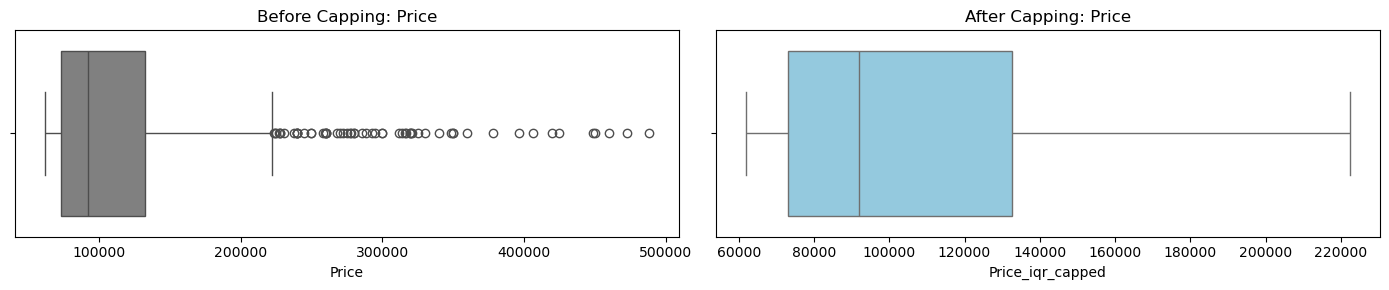

Discount: 3 outliers capped


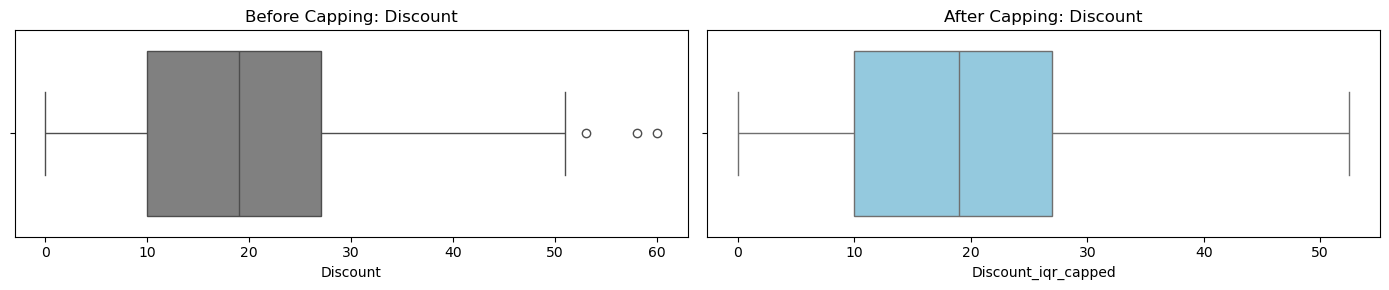

Original_price: 60 outliers capped


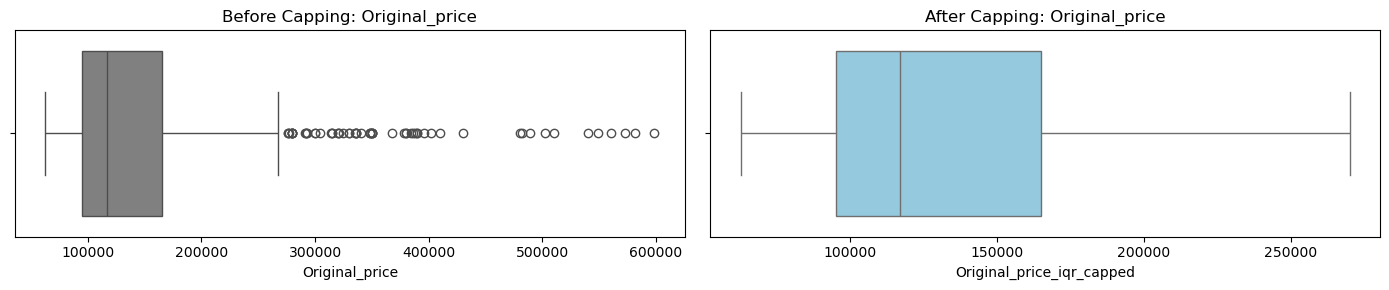

RAM_GB: 285 outliers capped


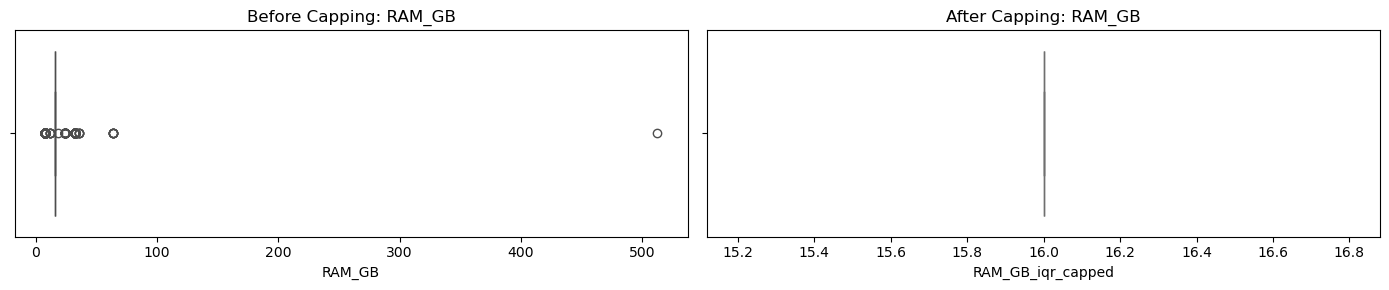

Storage_GB: 28 outliers capped


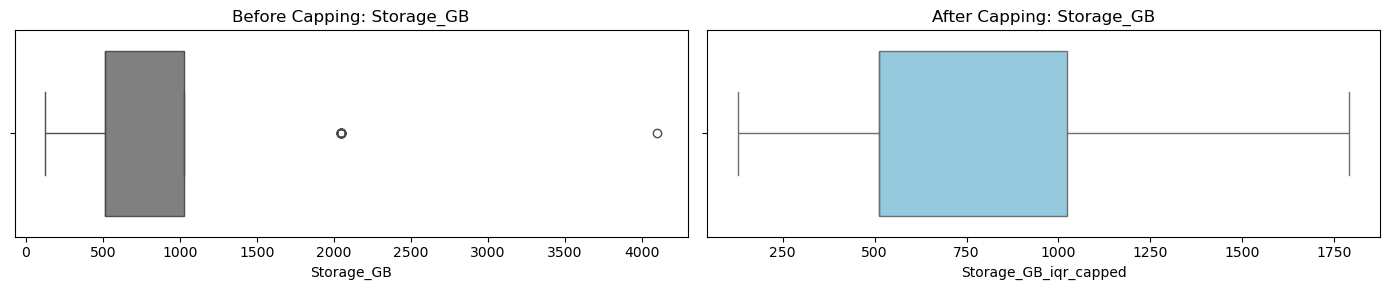

Display_cm: 1 outliers capped


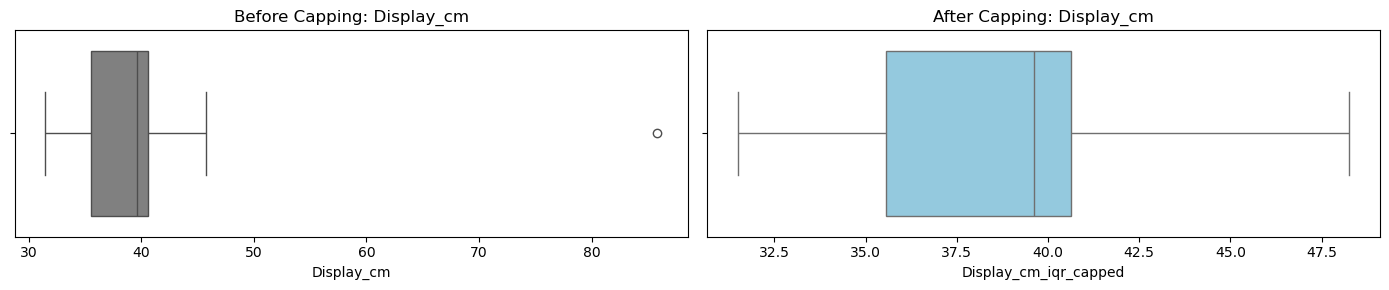

Display_inch: 1 outliers capped


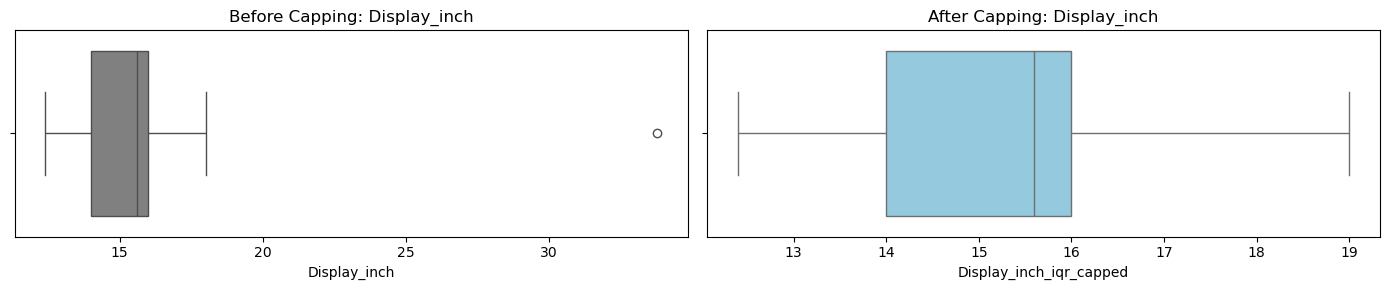

Warranty: 137 outliers capped


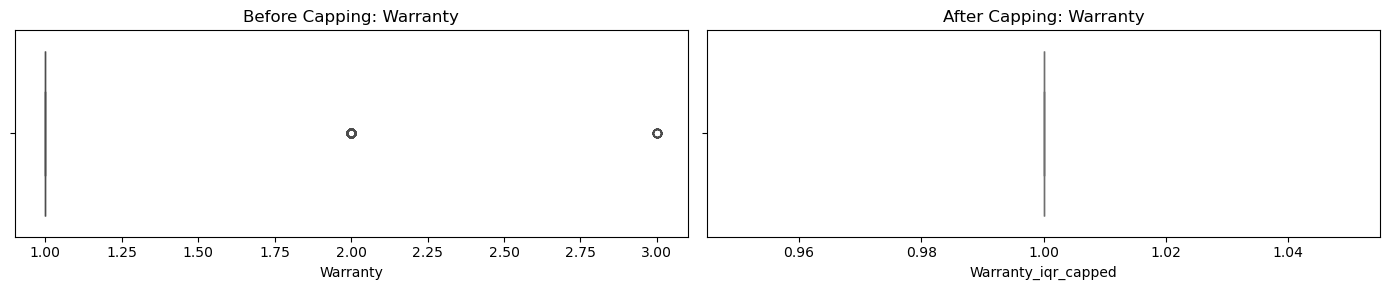

Processor_Gen_Num: 96 outliers capped


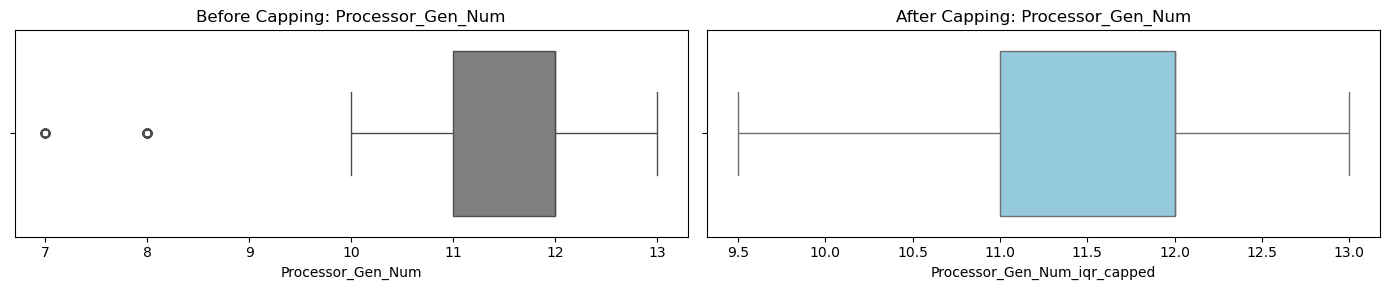


📊 Before vs After IQR Capping:



,mean_before,median_before,std_before,min_before,max_before,mean_after,median_after,std_after,min_after,max_after
Price,115296.75,91990.00,64009.74,61999.0,487990.00,110011.45,91990.00,46781.33,61999.0,222365.00
Discount,18.73,19.00,11.68,0.0,60.00,18.71,19.00,11.64,0.0,52.50
Original_price,143160.16,116999.00,76496.13,62589.0,598529.00,136695.55,116999.00,55029.14,62589.0,269993.75
RAM_GB,18.02,16.00,17.77,8.0,512.00,16.00,16.00,0.00,16.0,16.00
Storage_GB,753.13,512.00,360.93,128.0,4096.00,743.30,512.00,319.67,128.0,1792.00
Display_cm,38.39,39.62,3.10,31.5,85.80,38.35,39.62,2.71,31.5,48.26
Display_inch,15.12,15.60,1.22,12.4,33.78,15.10,15.60,1.07,12.4,19.00
Warranty,1.17,1.00,0.42,1.0,3.00,1.00,1.00,0.00,1.0,1.00
Processor_Gen_Num,11.28,12.00,1.33,7.0,13.00,11.47,12.00,0.83,9.5,13.00


In [1733]:


# 1️⃣ Select numeric columns
num_col = df.select_dtypes(include=['float64', 'int64']).columns

# 2️⃣ Store stats before capping
before_stats = df[num_col].describe().T[['mean', '50%', 'std', 'min', 'max']]
before_stats.rename(columns={'50%': 'median'}, inplace=True)

# 3️⃣ Loop through each numeric column for IQR capping
for col in num_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {outliers.shape[0]} outliers capped")

    # Create a temporary capped column
    capped_col = f'{col}_iqr_capped'
    df[capped_col] = df[col].clip(lower=lower, upper=upper)

    # Plot before and after boxplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 3))
    sns.boxplot(x=df[col], ax=axes[0], color='gray')
    axes[0].set_title(f'Before Capping: {col}')
    sns.boxplot(x=df[capped_col], ax=axes[1], color='skyblue')
    axes[1].set_title(f'After Capping: {col}')
    plt.tight_layout()
    plt.show()

    # Replace original column with capped values
    df[col] = df[capped_col]
    df.drop(columns=[capped_col], inplace=True)

# 4️⃣ Stats after capping
after_stats = df[num_col].describe().T[['mean', '50%', 'std', 'min', 'max']]
after_stats.rename(columns={'50%': 'median'}, inplace=True)

# 5️⃣ Combine before and after stats for comparison
comparison = before_stats.join(after_stats, lsuffix='_before', rsuffix='_after')

# 6️⃣ Show the summary comparison
print("\n📊 Before vs After IQR Capping:\n")
display(comparison.round(2))


In [1734]:
df.columns

Index(['Brand', 'Processor_Brand', 'Processor_Full', 'Price', 'Discount',
       'Original_price', 'RAM_GB', 'OS', 'Platform', 'Storage_GB',
       'Storage_unit', 'Display_cm', 'Display_inch', 'Warranty',
       'Availability', 'Processor_Gen_Num', 'Clean_Description'],
      dtype='object')